<a href="https://colab.research.google.com/github/chetasanand/Data-Science-Projects/blob/main/Assign_05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
import matplotlib.pyplot as plt

# Calculate silhouette_score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read files
trainfile = r'/gdrive/My Drive/CIS 508/Assign_5/SouthGermanCredit.xlsx'
trainData = pd.read_excel(trainfile) #creates a dataframe

print(trainData.shape)

(1000, 21)


In [ ]:
# To check number of null values
trainData.isna().sum()

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64

In [ ]:
null_data = trainData.loc[trainData.isnull().any(axis=1)]
trainData = trainData.dropna(how='any',axis=0)
print(trainData.isna().sum())
print(null_data.isna().sum())

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64
laufkont    0.0
laufzeit    0.0
moral       0.0
verw        0.0
hoehe       0.0
sparkont    0.0
beszeit     0.0
rate        0.0
famges      0.0
buerge      0.0
wohnzeit    0.0
verm        0.0
alter       0.0
weitkred    0.0
wohn        0.0
bishkred    0.0
beruf       0.0
pers        0.0
telef       0.0
gastarb     0.0
kredit      0.0
dtype: float64


In [ ]:
trainData['kredit'].value_counts()
# good credit to bad ratio = 2.33

1    700
0    300
Name: kredit, dtype: int64

In [ ]:
#Extract training and test data
kredit = trainData["kredit"]
trainData_cluster = trainData.drop(["kredit"], axis=1) #Remove customer id column

Clustering models are distance-based algorithms. In order to measure similarities between observations and form clusters they use a distance metric. So, features with high ranges will have a bigger influence on the clustering. Therefore, standardization is required before building a clustering model.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainData_cluster_ss = pd.DataFrame(scaler.fit_transform(trainData_cluster), index=trainData_cluster.index, columns = trainData_cluster.columns)
trainData_cluster_ss

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,-1.254566,-0.240857,1.344014,-0.301852,-0.787657,-0.699707,-1.145978,0.918477,-0.963650,-0.303686,1.046987,-0.341055,-1.281573,0.460831,-1.751205,-0.704926,0.146949,0.428290,-0.823318,0.196014
1,-1.254566,-0.987573,1.344014,-1.030963,-0.167384,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,-0.765977,-1.293723,0.040363,0.460831,-1.751205,1.027079,0.146949,-2.334869,-0.823318,0.196014
2,-0.459026,-0.738668,-0.503428,2.250036,-0.861381,-0.066488,0.510060,-0.870183,-0.963650,-0.303686,1.046987,-1.293723,-1.105315,0.460831,-1.751205,-0.704926,-1.383771,0.428290,-0.823318,0.196014
3,-1.254566,-0.738668,1.344014,-1.030963,-0.407341,-0.699707,-0.317959,0.024147,0.449326,-0.303686,-0.765977,-1.293723,0.304750,0.460831,-1.751205,1.027079,-1.383771,-2.334869,-0.823318,-5.101669
4,-1.254566,-0.738668,1.344014,-1.030963,-0.389974,-0.699707,-0.317959,0.918477,0.449326,-0.303686,1.046987,-0.341055,0.216621,-2.375050,0.135869,1.027079,-1.383771,0.428290,-0.823318,-5.101669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.254566,0.256953,-0.503428,0.062704,-0.455191,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,1.046987,-1.293723,-1.281573,0.460831,-1.751205,-0.704926,-1.383771,-2.334869,-0.823318,0.196014
996,-1.254566,0.256953,-0.503428,-1.030963,-0.343187,-0.699707,1.338078,0.918477,0.449326,1.790699,-1.672459,-1.293723,0.833525,0.460831,0.135869,-0.704926,0.146949,0.428290,-0.823318,0.196014
997,1.132053,0.008048,1.344014,-1.030963,3.334852,1.833169,1.338078,0.918477,0.449326,-0.303686,1.046987,1.564281,-0.488411,0.460831,2.022944,-0.704926,1.677670,0.428290,1.214598,0.196014
998,-0.459026,-0.738668,-0.503428,0.062704,1.133062,1.833169,-1.973997,-0.870183,0.449326,-0.303686,-1.672459,1.564281,1.450428,0.460831,0.135869,-0.704926,1.677670,0.428290,1.214598,0.196014


In [ ]:
#K-Means Clustering ========================================================================
#Default Mode - K=8
kmeans_8 = KMeans()
kmeans_8.fit(trainData_cluster_ss)
print(kmeans_8.labels_)
print(kmeans_8.cluster_centers_)
#Print Silhouette measure
print(silhouette_score(trainData_cluster_ss, kmeans_8.labels_))
print(trainData.shape)

[6 0 6 5 5 5 5 5 0 6 0 6 6 2 6 6 0 6 0 0 0 0 1 1 0 7 6 0 1 7 0 0 0 1 1 0 0
 0 1 0 0 4 0 3 7 6 3 0 1 3 1 1 1 0 7 0 0 5 7 7 0 1 0 2 0 1 7 1 1 7 0 7 7 7
 7 1 0 0 0 7 0 0 1 0 0 6 0 0 0 6 1 6 3 7 2 0 1 3 1 3 0 6 3 6 4 4 4 1 1 0 1
 7 6 1 7 6 6 6 0 7 2 0 1 1 7 0 1 1 1 0 1 7 1 1 7 1 7 7 0 0 7 7 7 1 6 7 7 6
 3 0 6 1 2 7 1 0 1 0 3 0 0 3 6 1 6 0 0 3 0 0 1 1 6 1 0 7 3 6 3 2 6 1 3 1 3
 3 7 7 3 1 6 3 2 1 1 2 0 0 1 3 7 4 7 5 5 3 6 1 2 7 5 6 6 5 1 4 6 5 2 5 7 0
 0 2 1 0 7 1 3 3 1 7 2 6 1 7 0 7 6 7 0 2 6 0 7 6 0 0 1 6 7 3 7 1 0 3 6 6 7
 3 1 0 1 6 1 7 1 7 6 7 6 2 6 7 7 3 7 3 6 6 1 1 6 6 1 6 0 1 7 0 0 6 0 3 0 2
 6 3 6 1 3 1 6 0 1 6 1 4 6 2 0 0 0 1 6 7 3 1 0 5 5 1 3 5 5 0 5 5 5 0 0 0 0
 6 0 5 5 0 4 5 0 5 0 5 0 5 7 0 1 0 5 7 3 4 7 2 4 5 1 0 0 1 0 1 7 7 7 3 6 6
 3 0 6 1 0 1 1 2 4 0 6 6 2 6 0 1 1 7 1 6 1 0 6 0 1 6 1 1 6 1 3 3 6 6 1 3 1
 3 3 2 6 3 0 3 0 0 0 0 0 0 1 0 0 7 0 0 2 0 6 6 6 7 3 3 0 7 1 1 0 3 6 3 2 1
 0 1 0 1 2 7 7 7 7 2 1 2 3 3 1 6 6 0 6 1 6 7 1 7 6 0 7 0 3 6 1 3 0 1 0 7 0
 6 3 5 0 3 0 5 3 7 1 0 3 

In [ ]:
#K-Means Clustering ========================================================================

sil = []
for k in range(2,10):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(trainData_cluster_ss)
  # print(kmeans.labels_)
  # print(kmeans.cluster_centers_)
  print(k, silhouette_score(trainData_cluster_ss, kmeans.labels_))
  sil.append(silhouette_score(trainData_cluster_ss, kmeans.labels_))
  # print(X_train.shape)

2 0.08307559905573254
3 0.07381195030765327
4 0.08392560863202456
5 0.07553347659249486
6 0.06808568213021673
7 0.07299892445705612
8 0.07019662569618638
9 0.07165193349472093


From the silhouette score, we find that k = 6 gives the best score of 0.08740829256664938

We will use k=6 going forward for this dataset

In [ ]:
#K-Means Clustering ========================================================================
#Default Mode - K=6
kmeans_3 = KMeans(n_clusters = 6)
kmeans_3.fit(trainData_cluster_ss)
# print(kmeans_3.labels_)
# print(kmeans_3.cluster_centers_)
#Print Silhouette measure
print(silhouette_score(trainData_cluster_ss, kmeans_3.labels_))
print(trainData.shape)

0.06748347247447287
(1000, 21)


In [ ]:
#Add Cluster Number to each datapoint + save file
df_kmeans=trainData_cluster.copy()
kmeans_predict_train=kmeans_3.predict(df_kmeans)
print(kmeans_predict_train)

df_kmeans['Cluster Number']=kmeans_3.labels_
print(trainData_cluster.shape)
print(df_kmeans.shape)
print(df_kmeans.head())
df_kmeans.dtypes

export_csv = df_kmeans.to_csv(r'/gdrive/My Drive/CIS 508/Assign_5/KmeansClusters_SGC-3.csv')

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
df_kmeans['Cluster Number'].value_counts()

1    257
4    245
0    181
2    149
3    132
5     36
Name: Cluster Number, dtype: int64

In [ ]:
print(df_kmeans.shape)
print(df_kmeans)
# df_kmeans = df_kmeans.append(y_train, ignore_index = True)
df_kmeans = pd.concat([df_kmeans, kredit], axis=1)
print(df_kmeans.shape)
print(df_kmeans)

export_csv = df_kmeans.to_csv(r'/gdrive/My Drive/CIS 508/Assign_5/KmeansClusters_SGC-3.csv')

(1000, 21)
     laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0           1        18      4     2   1049         1        2     4       2   
1           1         9      4     0   2799         1        3     2       3   
2           2        12      2     9    841         2        4     2       2   
3           1        12      4     0   2122         1        3     3       3   
4           1        12      4     0   2171         1        3     4       3   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
995         1        24      2     3   1987         1        3     2       3   
996         1        24      2     0   2303         1        5     4       3   
997         4        21      4     0  12680         5        5     4       3   
998         2        12      2     3   6468         5        1     2       3   
999         1        30      2     2   6350         5        5     4       3   

     buerge  ...  verm  alte

In [ ]:
# df_kmeans.groupby('kredit')['Cluster Number'].value_counts()
df_kmeans.groupby('Cluster Number')['kredit'].value_counts()

Cluster Number  kredit
0               1         108
                0          73
1               1         229
                0          28
2               0          76
                1          73
3               1          90
                0          42
4               1         167
                0          78
5               1          33
                0           3
Name: kredit, dtype: int64

In [ ]:
# Good to bad ratio for clusters

c0 = 6.05/2.33
c1 = 1.764/2.33
c2 = 1.983/2.33
c3 = 11/2.33
c4 = 2.93/2.33
c5 = 1.161/2.33

print(c0, c1, c2, c3, c4, c5)

2.59656652360515 0.7570815450643776 0.8510729613733906 4.721030042918454 1.257510729613734 0.4982832618025751


In [ ]:
# Assign kredit as 1 to clusters 0,3,4
# Assign kredit as 0 to clusters 1,2,5


In [ ]:
labels = list(set(kredit))
assign_labels = {}
for c in range(k):
    assign_labels[c]={}

    for la in labels:
        assign_labels[c][la] = 0

for i in range(len(df_kmeans)):
    assign_labels[kmeans_predict_train[i]][kredit[i]] += 1


assign_labels

KeyError: ignored

In [ ]:
pred_labels_6 = []
for p in kmeans_predict_train:
    pred_labels_6.append(max(assign_labels[p], key=assign_labels[p].get))
    
print("Confusion Matrix")
print(confusion_matrix(kredit,pred_labels_6))

print("=== Classification Report ===")
print(classification_report(kredit,pred_labels_6))
print('F1 Score')
print(f1_score(kredit,pred_labels_6))
print('Precision')
print(precision_score(kredit,pred_labels_6))
print('AUC')
print(roc_auc_score(kredit,pred_labels_6))

Confusion Matrix
[[  0 300]
 [  0 700]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.70      1.00      0.82       700

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.49      0.70      0.58      1000

F1 Score
0.8235294117647058
Precision
0.7
AUC
0.5


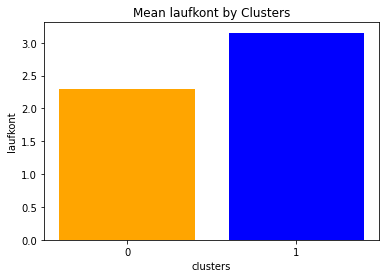

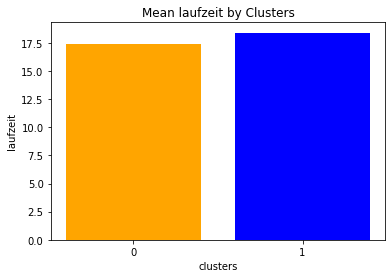

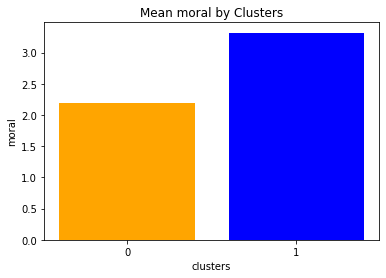

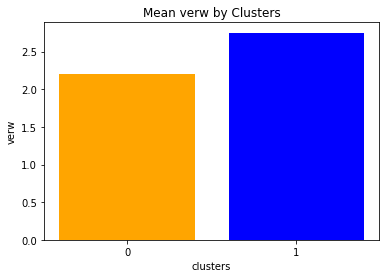

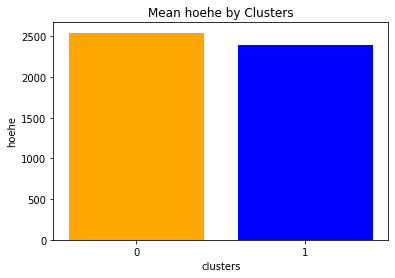

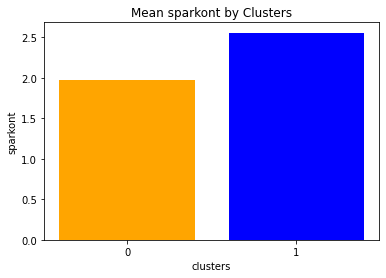

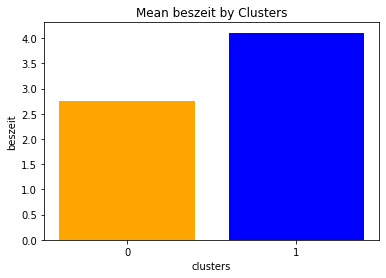

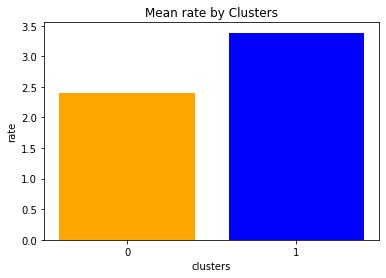

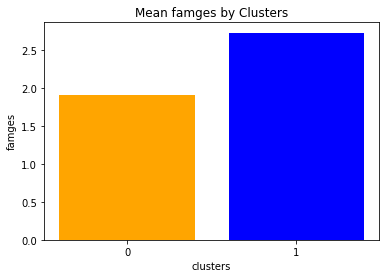

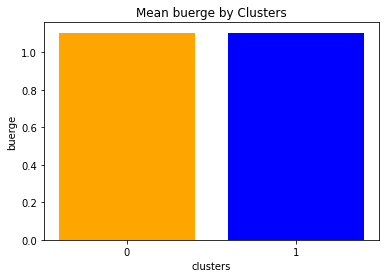

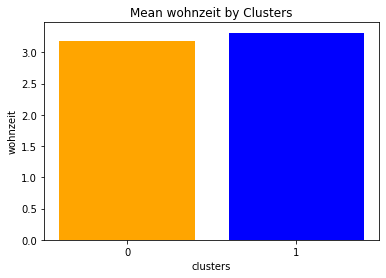

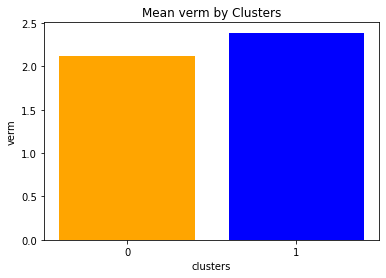

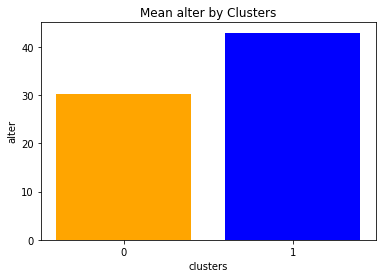

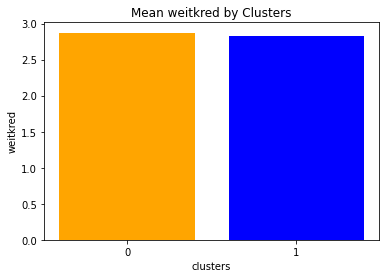

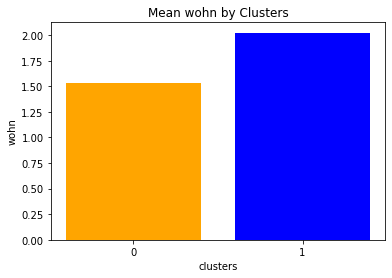

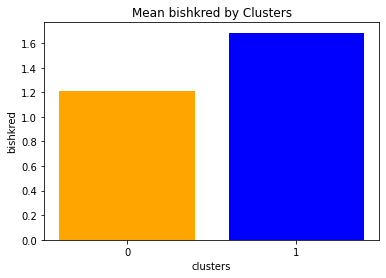

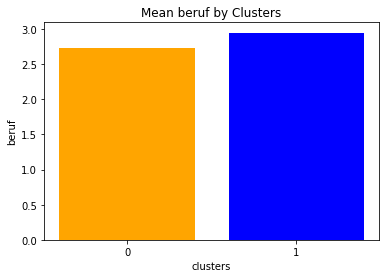

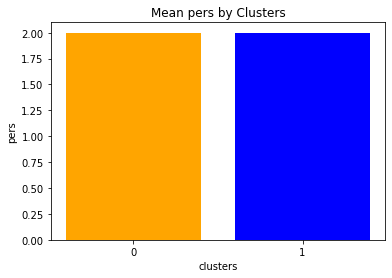

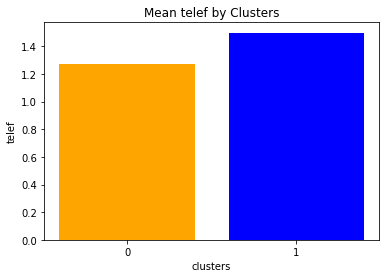

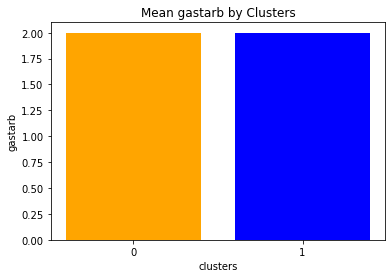

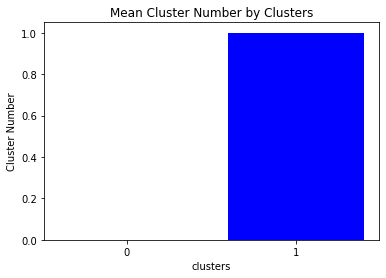

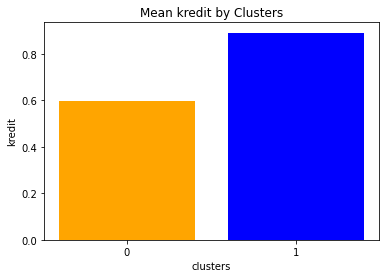

In [ ]:
k = 2

for col in (df_kmeans.columns):
    means_ = []
    for c in range(k):
        means_.append(df_kmeans[df_kmeans['Cluster Number'] == c][col].mean())
        
    plt.xticks(np.arange(k))
    plt.title('Mean '+col+ ' by Clusters')
    plt.xlabel('clusters')
    plt.ylabel(col)
    plt.grid(False)

    plt.bar(range(k), means_, color=['orange', 'b'])
    plt.show()